## k-Nearest-Neighbors Classifier

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [5]:
df = pd.read_csv('../clean_train.csv')
df_test = pd.read_csv('../clean_test.csv')

df.head()

,id,gps_height,longitude,latitude,region_code,district_code,population,payment,status_group,recordDay,...,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
0,69572,1390.0,34.938093,-9.856322,11,5,109.0,1.0,functional,14,...,1,0,0,0,1,0,0,0,0,0
1,8776,1399.0,34.698766,-2.147466,20,2,280.0,0.0,functional,6,...,0,1,0,0,1,0,0,0,0,0
2,34310,686.0,37.460664,-3.821329,21,4,250.0,1.0,functional,25,...,0,1,0,0,0,1,0,0,0,0
3,67743,263.0,38.486161,-11.155298,90,63,58.0,0.0,non functional,28,...,1,0,0,0,0,1,0,0,0,0
4,19728,1300.0,31.130847,-1.825359,18,1,250.0,0.0,functional,13,...,0,1,0,0,1,0,0,0,0,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [7]:
df.shape, df_test.shape

((59400, 65), (14850, 62))

In [8]:
df.columns.difference(df_test.columns)

Index(['extraction_type_other - mkulima/shinyanga', 'scheme_management_None',
       'status_group'],
      dtype='object')

In [9]:
df.drop(columns=['extraction_type_other - mkulima/shinyanga' ,'scheme_management_None'], inplace=True)

df.shape, df_test.shape

((59400, 63), (14850, 62))

### Modeling

Feature Set

In [10]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['status_group'], axis=1)
y = df['status_group']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

print('Training set: ', X_train.shape, y_train.shape)
print('Testing set: ', X_test.shape, y_test.shape)

Training set:  (41580, 62) (41580,)
Testing set:  (17820, 62) (17820,)


### Which K is most accurate?

Examining what number of K nearest neighbors is the most accurate number to use.

In [11]:
error_rate = []

for k in range(1,10):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  pred_k = knn.predict(X_test)
  error_rate.append(np.mean(pred_k!=y_test))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

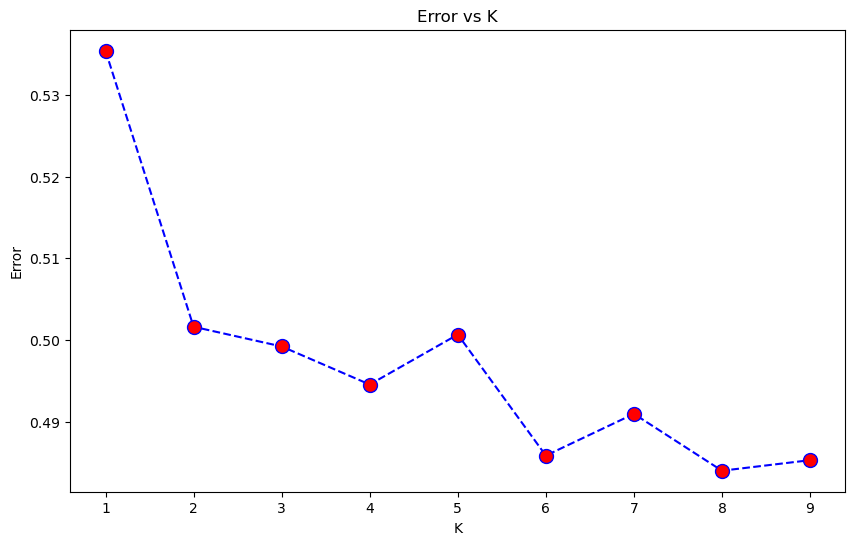

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),
         error_rate,
         color='blue',
         linestyle='dashed',
         marker='o',
         markerfacecolor='red',
         markersize=10)

plt.title('Error vs K')
plt.xlabel('K')
plt.ylabel('Error')
plt.show()

Train the Model and Predict

In [23]:
k = 8

knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)

predictions = knn.predict(X_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Confusion Matrix

In [24]:
print(classification_report(y_test, predictions))

                         precision    recall  f1-score   support

             functional       0.55      0.76      0.64      9550
functional needs repair       0.11      0.01      0.02      1330
         non functional       0.43      0.27      0.33      6940

               accuracy                           0.52     17820
              macro avg       0.36      0.35      0.33     17820
           weighted avg       0.47      0.52      0.47     17820



In [25]:
print('Train set Accuracy: ', metrics.accuracy_score(y_train, knn.predict(X_train)))
print('Test set Accuracy: ', metrics.accuracy_score(y_test, predictions))

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train set Accuracy:  0.6247955747955748
Test set Accuracy:  0.515993265993266


### Submission File for DrivenData

Create prediction on test data and create dataframe for competition submission.

In [26]:
X2 = df_test.values

prediction_test = knn.predict(X2)
df_pred = pd.DataFrame(prediction_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [27]:
df_test.shape, df_pred.shape

((14850, 62), (14850, 1))

In [28]:
df_pred.head()

,0
0,functional
1,functional
2,functional
3,non functional
4,non functional


In [29]:
df= pd.read_csv('../testSet-indep.csv')

df = pd.concat([df['id'], df_pred], axis=1)

df.to_csv('../submissions/Submission_knn.csv', index=False)